In [97]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import warnings

In [55]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [128]:
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','Chol_1','BUN_1','HDL_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','Chol_2','BUN_2','HDL_2']]

In [129]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,Chol_2,BUN_2,HDL_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,NaN,13.1,77.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,NaN,19.2,59.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,NaN,17.1,40.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,NaN,12.2,54.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,NaN,16.5,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1 if x=='M' else 0)

In [131]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)

In [132]:
#HDL 분류
#40미만 낮음 -> 0
#40~59: 보통 -> 1
#60이상 높음 -> 2

psqi_df["HDL_1"] = psqi_df["HDL_1"].apply(lambda x: 0 if x<40 else 1 if x<60 else 2)
psqi_df["HDL_2"] = psqi_df["HDL_2"].apply(lambda x: 0 if x<40 else 1 if x<60 else 2)

In [133]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [134]:
#x 배열 생성 (x=AGE, SEX, PSQI, BMI)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','Chol_1','BUN_1']]
X1.columns = ['AGE','SEX','BMI','PSQI_TOTAL','Insulin ','CRP','WBC','Neutrophil','Lym','GLU0',
            'Creatinine','AST','ALT','TG','LDL','Muscle','Fat_x','FatPercentage','WHR','SBP',
            'DBP','HR','Waist','Chol','BUN']

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','Chol_2','BUN_2']]
X2.columns = ['AGE','SEX','BMI','PSQI_TOTAL','Insulin ','CRP','WBC','Neutrophil','Lym','GLU0',
            'Creatinine','AST','ALT','TG','LDL','Muscle','Fat_x','FatPercentage','WHR','SBP',
            'DBP','HR','Waist','Chol','BUN']
X=pd.concat([X1, X2], axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']]
Y2= psqi_df[['HDL_2']]
Y1.columns = ['HDL']
Y2.columns = ['HDL']
Y=pd.concat([Y1, Y2], axis=0)

In [135]:
X

,AGE,SEX,BMI,PSQI_TOTAL,Insulin,CRP,WBC,Neutrophil,Lym,GLU0,...,Muscle,Fat_x,FatPercentage,WHR,SBP,DBP,HR,Waist,Chol,BUN
0,35,1,24.097789,5.0,5.57,<0.1,5.82,54.6,35.0,89.0,...,32.2,17.8,23.8,0.96,129.0,77.0,64.0,90.0,166.0,15.5
1,46,1,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90.0,...,36.1,16.0,20.0,0.84,123.0,73.0,83.0,85.5,246.0,12.5
2,32,1,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96.0,...,29.4,16.4,24.0,0.89,131.0,87.0,105.0,82.0,207.0,16.0
3,33,0,20.616175,4.0,3.52,<0.1,5.84,39.1,42.1,81.0,...,24.1,12.4,22.0,0.80,113.0,69.0,69.0,66.0,220.0,13.5
4,28,0,18.437500,3.0,2.86,<0.1,4.22,49.3,39.3,63.0,...,19.7,10.5,22.3,0.80,124.0,75.0,88.0,61.0,166.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,63,0,24.362705,8.0,1.80,0.3,3.89,38.4,51.9,93.0,...,23.2,27.3,39.3,0.94,134.0,89.0,81.0,98.0,141.0,17.1
176,57,1,27.295178,3.0,20.40,6.2,4.66,57.5,30.7,106.0,...,35.7,22.1,25.7,0.95,113.0,76.0,66.0,97.5,134.0,14.6
177,35,0,20.840203,2.0,5.10,0.3,7.75,60.7,30.5,91.0,...,22.8,17.5,29.9,0.84,107.0,72.0,64.0,80.5,147.0,9.7
178,61,0,20.281993,7.0,9.30,0.2,4.35,45.1,40.7,99.0,...,20.9,15.3,29.0,0.81,106.0,76.0,92.0,79.0,134.0,10.2


In [136]:
Y

,HDL
0,1
1,2
2,1
3,2
4,2
...,...
175,2
176,1
177,1
178,2


In [143]:
Y['HDL'].value_counts()

1    184
2    162
0     14
Name: HDL, dtype: int64

In [144]:
X.shape, Y.shape

((360, 25), (360, 1))

In [145]:
psqi_df_cut_1=X.iloc[:,:5]
psqi_df_cut_2=X.iloc[:,5:10]
psqi_df_cut_3=X.iloc[:,10:15]
psqi_df_cut_4=X.iloc[:,15:20]
psqi_df_cut_5=X.iloc[:,20:26]

psqi_df_cut_1=pd.concat([psqi_df_cut_1, Y], axis=1)
psqi_df_cut_2=pd.concat([psqi_df_cut_2, Y], axis=1)
psqi_df_cut_3=pd.concat([psqi_df_cut_3, Y], axis=1)
psqi_df_cut_4=pd.concat([psqi_df_cut_4, Y], axis=1)
psqi_df_cut_5=pd.concat([psqi_df_cut_5, Y], axis=1)

In [148]:
warnings.filterwarnings(action='ignore')

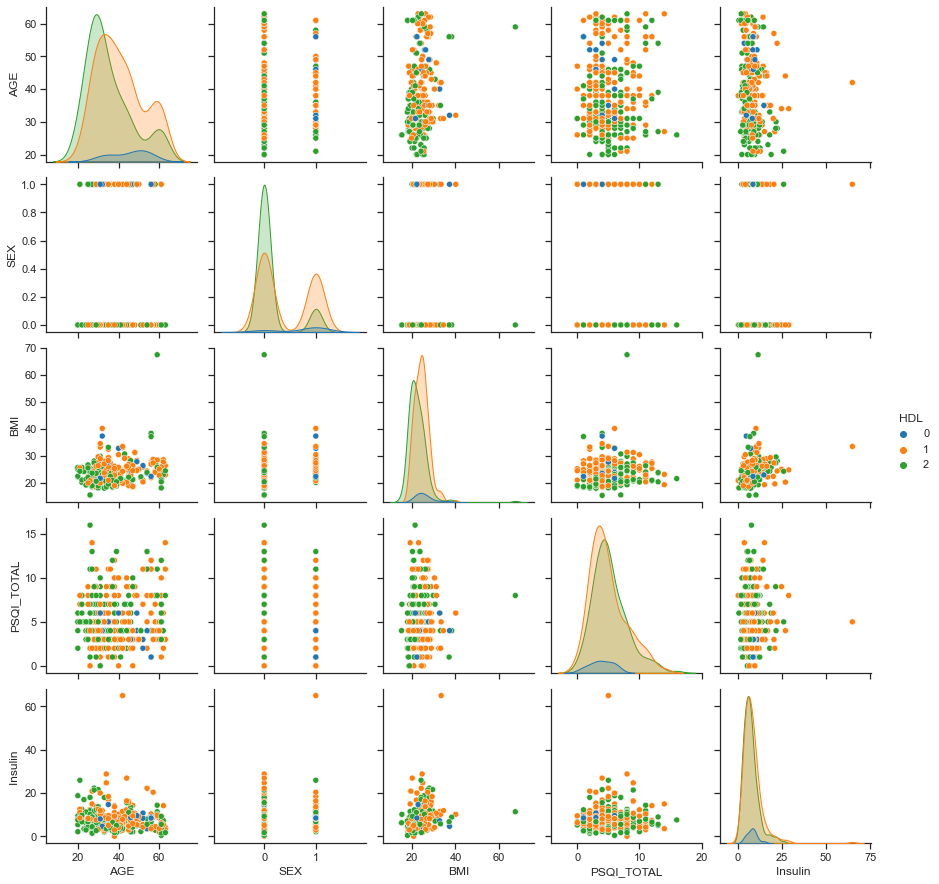

In [149]:
sns.pairplot(psqi_df_cut_1, hue="HDL", palette='tab10')
plt.show()

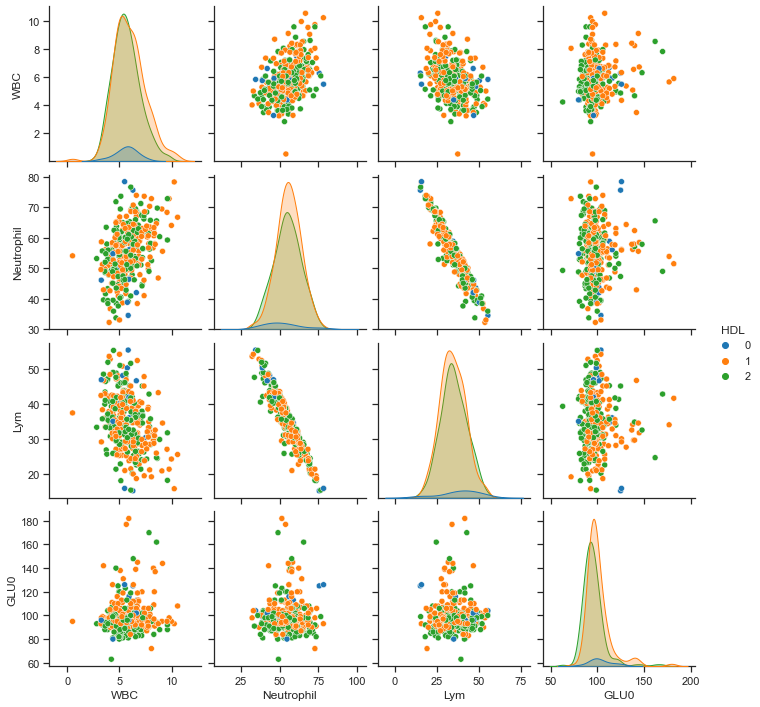

In [150]:
sns.pairplot(psqi_df_cut_2, hue="HDL", palette="tab10")
plt.show()

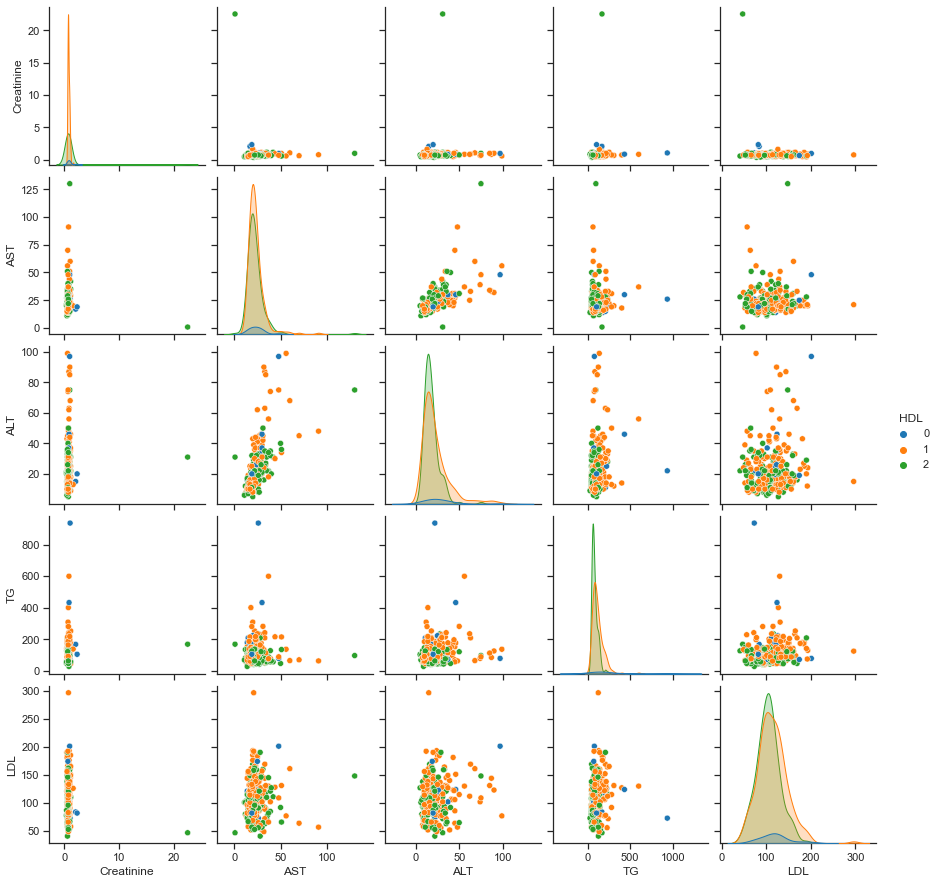

In [151]:
sns.pairplot(psqi_df_cut_3, hue="HDL", palette='tab10')
plt.show()

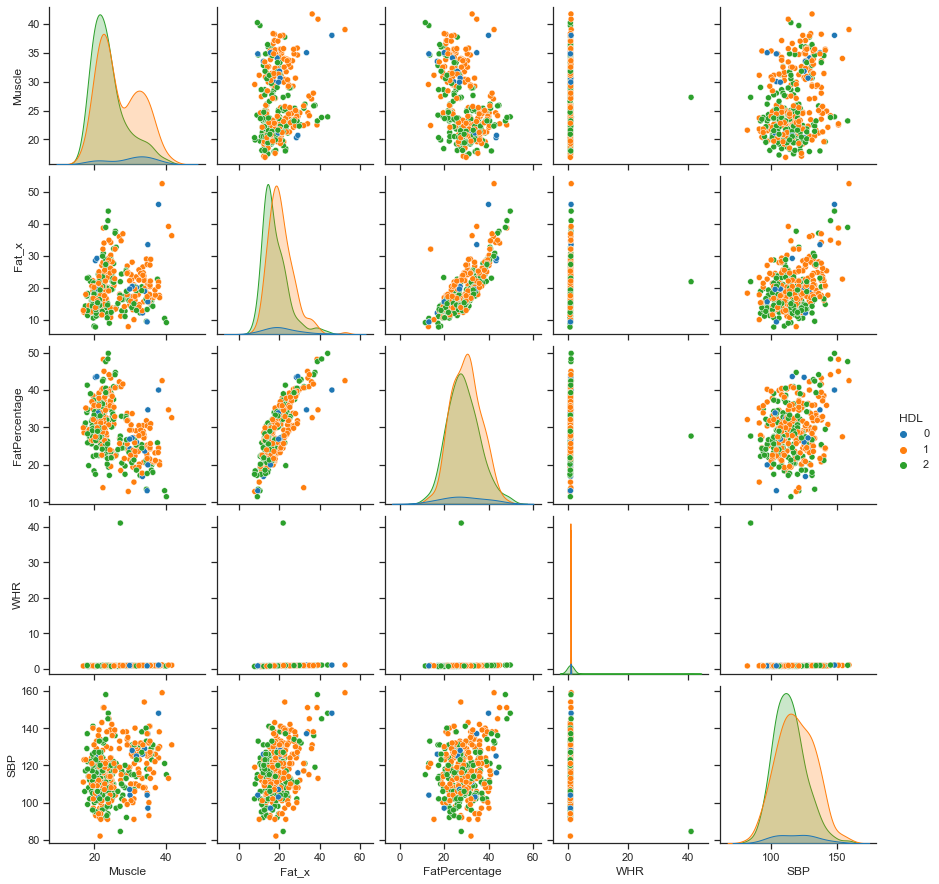

In [152]:
sns.pairplot(psqi_df_cut_4, hue="HDL", palette='tab10')
plt.show()

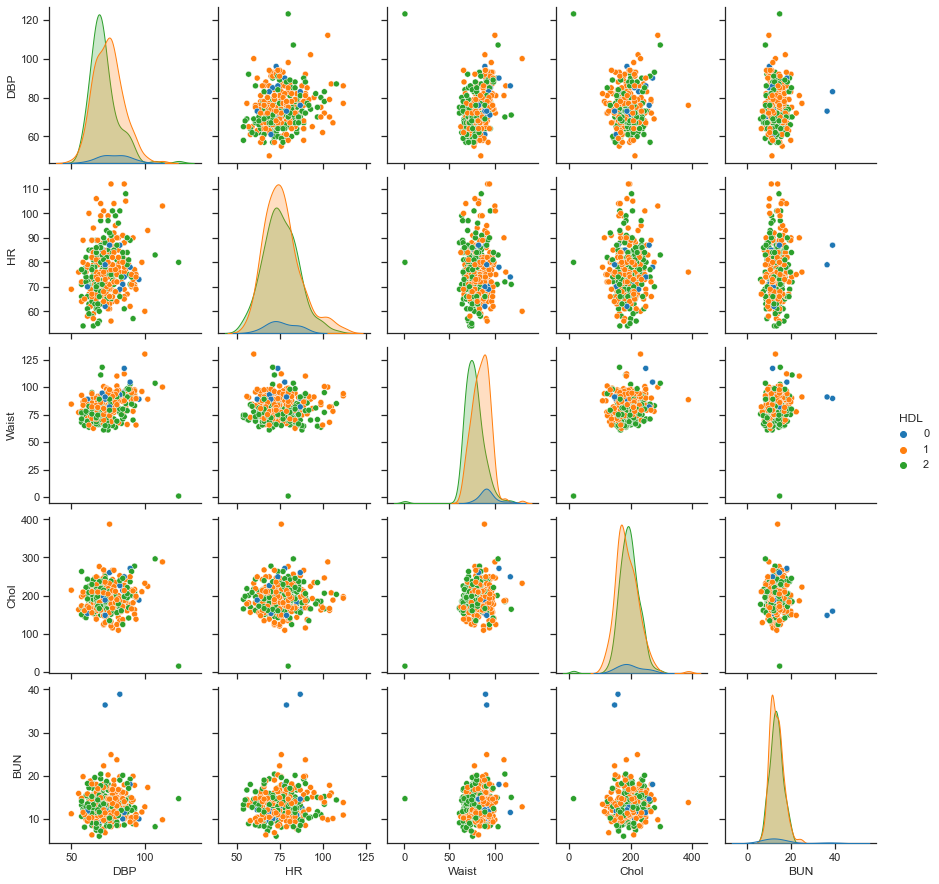

In [153]:
sns.pairplot(psqi_df_cut_5, hue="HDL", palette='tab10')
plt.show()